In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as colormaps

from importlib import reload

import environment as Env
import ray as Ray
import simulation as Sim

In [ ]:
reload(Env)

# floor = lambda x: -550 * np.ones_like(x)
# floor = lambda x: -500 * np.sin(0.001 * x) - 750
# floor = lambda x: -5 * np.sin(0.01 * x) - 750
# floor = lambda x: -0.27 * x - 500
floor = lambda x: np.maximum(-1 * np.exp(0.0005 * x) - 500, -1500 + 0.02*x)

ceiling = lambda x: 0 * np.ones_like(x)

env = Env.Environment2D(
    floor=floor,
    ceiling=ceiling
)

In [ ]:
# Source setup
source = np.array([0., 0.])
angle = -0.5
freq = 100

In [ ]:
reload(Ray)
ray = Ray.Ray2D(env, source, freq, angle)
ray.propagate()

print(ray.stop_reason)

In [ ]:
fig = plt.figure(figsize=(30, 10))
ray.plot(fig)
ray.env.plot(fig, c='red')
plt.xlim((ray.range_min[0], ray.range_max[0]))
plt.show()

plt.figure(figsize=(30, 10))
plt.plot(ray.XZ[:, 0], ray.G_dB)  # gain, in dB
plt.show()

plt.figure(figsize=(30, 10))
plt.plot(ray.XZ[:, 0], np.log(ray.G_dB - np.min(ray.G_dB) + 1))
plt.show()

plt.figure(figsize=(30, 10))
plt.plot(ray.XZ[:, 0], np.log(ray.Tmult))  # transmittance
plt.show()

In [156]:
reload(Ray)
reload(Env)
reload(Sim)

sim = Sim.Simulation2D (env, source)
# sim.add_rays (freq, -0.5, -0.6, -0.7, -0.8, -0.9, 1., dx_max=10, dz_max=10, n_rebounds_max=4, backprop=True)  # , verbose=True)
# sim.add_rays (freq, -0.5, -0.5001, -0.5002, -0.5003, -0.5004, dx_max=10, dz_max=10, backprop=False)  # , verbose=True)
# sim.add_rays (freq, -0.5, -0.500001, -0.500002, -0.500003, -0.50004, dx_max=10, dz_max=10, backprop=False)  # , verbose=True)
# sim.add_rays (freq, -0.5, -0.6, -0.7, -0.8, -0.9, 1., dx_max=50, dz_max=25, n_rebounds_max=20, backprop=True)  # , verbose=True)

# sim.add_rays (
#     freq,
#     *[i/100 for i in range(-1, -100, -1)],  #-10)],
#     dx_max=10,
#     dz_max=10,
#     backprop=True,
#     # n_rebounds_max=4
# )

# sim.add_rays (
#     freq,
#     *[i/100 for i in range(-1, -100, -1)],  #-10)],
#     dx_max=10,
#     dz_max=10,
#     backprop=True,
#     n_rebounds_max=4
# )

# sim.add_rays (
#     freq,
#     *[i/1000 for i in range(-1, -1000, -1)],
#     dx_max=50,
#     dz_max=25,
#     backprop=True,
#     n_rebounds_max=6  #4:25s 6:40s 8:?s 10:60s 20:1m45s
# )


sim.add_rays (
    freq,
    *[i/1000 for i in range(-1, -1000, -1)],
    dx_max=50,
    dz_max=25,
    backprop=False,
    n_rebounds_max=6  #4:25s 6:40s 8:?s 10:60s 20:1m45s
)

## heatmap tests
# sim.add_rays (
#     freq,
#     *[i/100 for i in range(-1, -100, -1)],
#     dx_max=50,
#     dz_max=25,
#     backprop=False,
#     n_rebounds_max=6  #4:25s 6:40s 8:?s 10:60s 20:1m45s
# )

In [157]:
#TODO: 3D plot through time and 2D animation through time
# fig = plt.figure(figsize=(100, 30))
# sim.plot(fig)
# # plt.close(fig)
# plt.xlim((sim.range_min[0], sim.range_max[0]))
# plt.ylim((sim.range_min[1], sim.range_max[1]))
# plt.show(fig)

# fig.savefig('out.jpg', format='jpg')

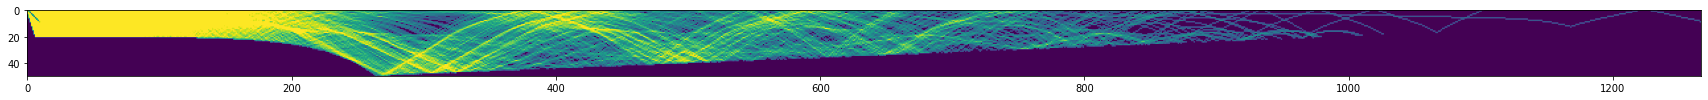

In [182]:
res = np.array([50, 25])

# heatmap_plot = sim.heatmap(res=res, reduction_power=.5, cutoff=.1)
# plt.figure(figsize=(30, 10))
# plt.imshow(heatmap_plot)

heatmap_plot = sim.heatmap(res=res, reduction_power=.5, cutoff=.02)
plt.figure(figsize=(30, 10))
plt.imshow(heatmap_plot)

In [181]:
import cv2

heatmap_plot_norm = (heatmap_plot - np.min(heatmap_plot)) / np.max(heatmap_plot)
heatmap_norm_3ch = np.tile(heatmap_plot_norm * 255, (3, 1, 1))
heatmap_norm_3ch = np.transpose(heatmap_norm_3ch, (1, 2, 0))

cv2.imwrite('heatmap.jpg', heatmap_norm_3ch)

True

In [ ]:
# TODO: add tickmarks
xdim, ydim = heatmap_plot.shape
plt.figure(figsize=(30, 10))

xticks_npoints = 10
yticks_npoints = 6
xticks_heatmap = np.linspace(0, ydim, xticks_npoints)
yticks_heatmap = np.linspace(0, xdim, yticks_npoints)
xticks_true = np.round(np.linspace(0, ydim, xticks_npoints) * res[0], 0) .astype(int)
yticks_true = np.round(np.linspace(0, xdim, yticks_npoints) * -1 * res[1], 0) .astype(int)
# TODO: Replace with clean arange

plt.xticks(xticks_heatmap, xticks_true)
plt.yticks(yticks_heatmap, yticks_true)
plt.xlabel('Distance [m]')
plt.ylabel('Altitude [m]')

plt.imshow(heatmap_plot)  # plt.imsave('heatmap.png', heatmap_plot.T)

In [ ]:
# # Plot ground (convex assumption)
# z_floor = sim.env.floor(np.arange(0, ydim, 1) * res[0])  # floor samples
# z_width = np.arange(0, xdim, 1) * -1 * res[1]
# floor_mask = (np.tile(z_width, (ydim, 1)).T < z_floor).T

# floor_overlay = np.tile(floor_mask * 255, (3, 1, 1))
# floor_overlay = np.transpose(floor_overlay, (2, 1, 0))
# floor_overlay[:, :, 1:] = 0
# heatmap_norm_3ch += floor_overlay

# cv2.imwrite('heatmap-with-floor.jpg', heatmap_norm_3ch)
# cv2.imwrite('floor.jpg', floor_mask.T*255)